<a href="https://colab.research.google.com/github/lmencisoe/ADL/blob/main/Taller1_ADL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Taller 1 - Análisis con Deep learning
# Integrantes: 
# **Miguel Enciso**
# **Vihlai Maldonado**

### Problema
El lenguaje de señas ha sido una herramienta que por más de 300 años ha ayudado a millones de personas a comunicarse de una manera eficaz. Actualmente, el 5% de la población mundial sufre de pérdida auditiva y la OMS estima que en el 2050, 1 de cada 10 habitantes padecerá de alguna enfermedad relacionada a problemas auditivos.

Ante la nueva ola de máquinas relacionadas al campo de la medicina, un conjunto de médicos le ha pedido realizar un modelo que les permita interpretar de manera eficiente el lenguaje de señas a través de imágenes. Esto con el fin de poder atender a sus pacientes con limitaciones de comunicación y poderles brindar un mejor servicio. Para esto, los médicos le han proporcionado un conjunto de datos donde capturaron el "gesto" de cada una de las letras del abecedario y se encargaron de etiquetarlas, excluyendo las letras como la J y la Z debido a causa del movimiento. \
Datos: https://www.kaggle.com/datamunge/sign-language-mnist

### 0. Importación de paquetes

In [ ]:
!pip install scikeras
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.7 MB/s 
     |████████████████████████████████| 1.6 MB 35.0 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input, Reshape
from keras import backend as K
from keras import applications
from keras.utils.vis_utils import plot_model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from scikeras.wrappers import KerasClassifier, KerasRegressor

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.8.2


### 1. Entendimiento del Negocio

El dataset consiste de 784 columnas cada una con un valor entre 0 y 255 correspondiente a un pixel de la imágen (28x18 pixeles) y una columna `label` que corresponde a la letra que representa cada instancia.

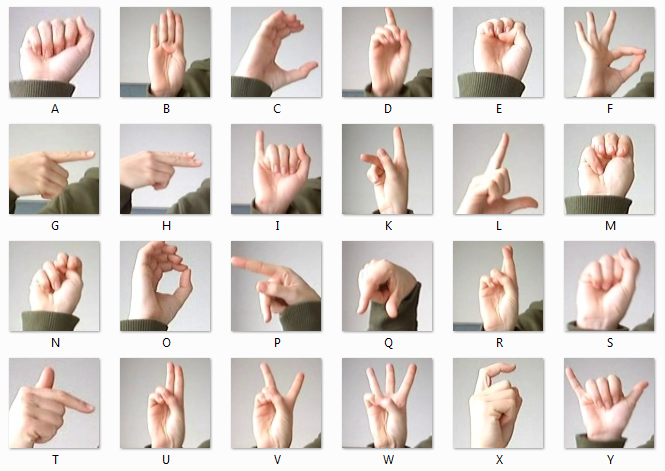

### 2. Entendimeinto de los Datos

In [ ]:
# train_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1D-2Ns8x2oLYfe7p1HSDFjgrmA5gTWk1Icb3WR75U5OQ/export?format=csv&gid=972642620')
train_df = pd.read_csv('https://raw.githubusercontent.com/samurainote/CNN_for_Sign_Language_Images/master/sign_mnist_train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/samurainote/CNN_for_Sign_Language_Images/master/sign_mnist_test.csv')
y_train = train_df['label']
X_train = train_df.drop(['label'], axis=1)
y_test = test_df['label']
X_test = test_df.drop(['label'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=33)


In [ ]:
train_df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


Observamos que las columnas `label` y las 784 columnas asociadas a cada pixel.

In [ ]:
#Conversión a numpy array
def convert_datarame_to_numpy_array(input_df):
  return np.array(input_df,dtype="float32")
X_train=convert_datarame_to_numpy_array(X_train)
y_train=convert_datarame_to_numpy_array(y_train)
X_val=convert_datarame_to_numpy_array(X_val)
y_val=convert_datarame_to_numpy_array(y_val)
X_test=convert_datarame_to_numpy_array(X_test)
y_test=convert_datarame_to_numpy_array(y_test)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(21964, 784)
(5491, 784)
(7172, 784)


18.0


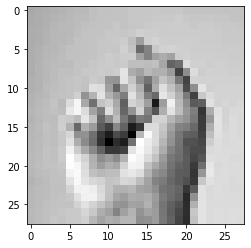

In [ ]:
i = random.randint(1,X_train.shape[0])
plt.imshow(X_train[i].reshape(28,28) , cmap = 'gray')
print(y_train[i])

A continuación se evalua la presencia de valores negativos en el dataset y valores por encima de 255 en lasc olumnas de pixeles.

In [ ]:
train_df[train_df['label'] < 0]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784


In [ ]:
print('Negativos en el dataset: ' ,any(train_df.min() <0))
print('Valores por encima de 255 en las columnas de los pixeles: ', any(train_df.drop(['label'], axis =1).max() >255))

Negativos en el dataset:  False
Valores por encima de 255 en las columnas de los pixeles:  False


De lo anterior concluimos que no tenemos valores fuera del rango en el dataset.

In [ ]:
y_values = train_df['label'].sort_values().unique()
y_values

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

Observamos que contamos con valores de clase desde 0 hasta 24 (sin el 9), correspondiente a 24 caracteres distintos del alfabeto como se observa en la imágen de la sección 1:

In [ ]:
labels={0:'A', 1:'B', 2: 'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 10:'K', 11:'L', 12:'M',
        13:'N', 14:'O', 15:'P', 16:'Q',17:'R', 18:'S', 19:'T', 20:'U', 21:'V', 22:'W', 23:'X', 24:'Y'}

A continuación se grafican algunos de las imagenes del dataset, cada letra del alfabeto:

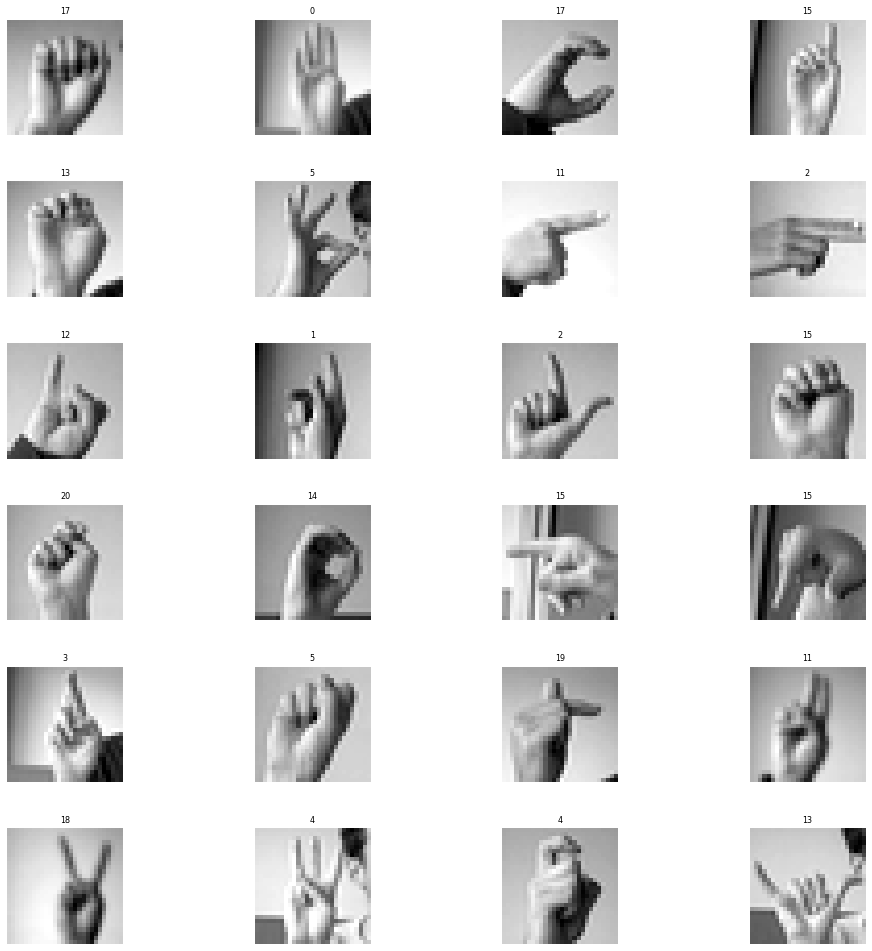

In [ ]:
fig, axes = plt.subplots(6, 4, figsize = (17,17))
axes = axes.ravel()
for img in np.arange(0, 24):
  letter = y_values[img]
  index =  np.where(y_train == letter)[0][0]#y_train[y_train == img].index[0]
  axes[img].imshow( X_train[index].reshape(28,28), cmap='gray')
  axes[img].set_title(int(y_train[letter]), fontsize = 8)
  axes[img].axis('off')
plt.subplots_adjust(hspace=0.4)

Verificamos valores nulos en los datos de entrenamiento, validación y prueba

In [ ]:
print(np.isnan(np.sum(X_train)))
print(np.isnan(np.sum(y_train)))

False
False


In [ ]:
print(np.isnan(np.sum(X_test)))
print(np.isnan(np.sum(y_test)))

False
False


In [ ]:
print(np.isnan(np.sum(X_val)))
print(np.isnan(np.sum(X_val)))

False
False


Del resultado anterior observamos que no tenemos valores nulos.

## 3. Preparación de datos

In [ ]:
#Normalización
X_train = X_train / 255
X_test = X_test / 255
X_val = X_val / 255

X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))
X_val = X_val.reshape((len(X_val), np.prod(X_val.shape[1:])))

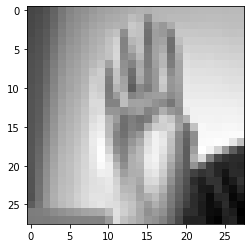

In [ ]:
plt.imshow(X_train[10].reshape(28, 28), cmap="gray")

## 4. Modelamiento

In [ ]:
#TODO: buscar hiperparametros
# ramdomsearch, gridsearch, busqueda bayesiana, autogenerativa

### 4.1 Perceptrón multicapa

In [ ]:
#Entrada
X_train.shape[1]

784

In [ ]:
#Salida
np.unique(y_train).shape[0]

24

La capa de entrada tiene 784 neuronas, cada una asociada a un pixel de la imágen, y la capa de salida tiene 24 neuronas, ya que tenemos 24 clases en nuestro dataset. Este problema es de clasificación multiclase, ya que cada instancia corresponde a sólo un caracter.

In [ ]:
def get_model(meta, activation, n_layers, hidden_layers_list):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    dims = hidden_layers_list

    model = Sequential(name="Red_CV")
    model.add(Dense(n_features_in_, input_shape=X_shape_[1:]))

    for i in range(n_layers):
        model.add(Dense(dims[i], activation=activation))
    
    #model.add(Dense(24, activation='sigmoid'))
    model.add(Dense(24, activation='softmax'))
    return model

Modelo base de perceptrón multicapa:

In [ ]:
clf_mlp = KerasClassifier(
    get_model,
    loss="categorical_crossentropy",
    n_layers=4,
    metrics=["accuracy"],
    epochs=50,
    activation="sigmoid",
    hidden_layers_list = [256]*4
)

clf_mlp

KerasClassifier(
	model=<function get_model at 0x7f44545bb560>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	n_layers=4
	activation=sigmoid
	hidden_layers_list=[256, 256, 256, 256]
	class_weight=None
)

Entrenamiento del modelo base:

In [ ]:
clf_mlp.fit(X_train,
        pd.get_dummies(y_train),
        validation_data=(    
                X_val, 
                pd.get_dummies(y_val)
            )
        )

Epoch 1/50
687/687 [==============================] - 7s 5ms/step - loss: 3.0016 - accuracy: 0.0860 - val_loss: 2.7543 - val_accuracy: 0.1355
Epoch 2/50
687/687 [==============================] - 3s 4ms/step - loss: 2.3196 - accuracy: 0.2248 - val_loss: 2.5495 - val_accuracy: 0.2149
Epoch 3/50
687/687 [==============================] - 2s 3ms/step - loss: 1.8948 - accuracy: 0.3600 - val_loss: 1.6206 - val_accuracy: 0.4280
Epoch 4/50
687/687 [==============================] - 2s 3ms/step - loss: 1.5282 - accuracy: 0.4737 - val_loss: 1.5690 - val_accuracy: 0.4491
Epoch 5/50
687/687 [==============================] - 2s 3ms/step - loss: 1.2533 - accuracy: 0.5621 - val_loss: 1.4721 - val_accuracy: 0.5116
Epoch 6/50
687/687 [==============================] - 2s 3ms/step - loss: 1.0229 - accuracy: 0.6459 - val_loss: 0.7854 - val_accuracy: 0.7172
Epoch 7/50
687/687 [==============================] - 2s 3ms/step - loss: 0.8241 - accuracy: 0.7205 - val_loss: 1.0944 - val_accuracy: 0.6529
Epoch 

KerasClassifier(
	model=<function get_model at 0x7f44545bb560>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=50
	n_layers=4
	activation=sigmoid
	hidden_layers_list=[256, 256, 256, 256]
	class_weight=None
)

### 4.1.1 Evaluación

Desempeño en datos de entrenamiento

In [ ]:
y_pred = clf_mlp.predict(X_train)
y_pred

687/687 [==============================] - 1s 1ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [ ]:
print(classification_report(pd.get_dummies(y_train), y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       899
           1       0.99      1.00      1.00       806
           2       1.00      0.99      1.00       915
           3       0.97      0.97      0.97       952
           4       1.00      0.94      0.97       767
           5       0.92      1.00      0.96       946
           6       0.96      0.99      0.98       868
           7       0.99      0.99      0.99       806
           8       0.97      0.92      0.94       926
           9       0.94      0.95      0.95       876
          10       0.94      1.00      0.97      1023
          11       0.96      0.92      0.94       861
          12       0.95      0.99      0.97       930
          13       0.98      1.00      0.99       964
          14       0.97      1.00      0.98       872
          15       1.00      1.00      1.00      1019
          16       0.94      0.92      0.93      1030
          17       0.93    

Evaluación en los datos de test:

In [ ]:
y_pred = clf_mlp.predict(X_test)
y_pred
print(classification_report(pd.get_dummies(y_test), y_pred))

225/225 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       331
           1       0.85      0.92      0.88       432
           2       0.89      0.98      0.93       310
           3       0.77      0.71      0.74       245
           4       0.95      0.82      0.88       498
           5       0.58      0.93      0.71       247
           6       0.79      0.72      0.75       348
           7       0.91      0.89      0.90       436
           8       0.77      0.55      0.64       288
           9       0.61      0.53      0.57       331
          10       0.75      1.00      0.86       209
          11       0.70      0.75      0.72       394
          12       0.75      0.46      0.57       291
          13       0.79      0.76      0.77       246
          14       0.94      0.97      0.95       347
          15       0.60      0.98      0.74       164
          16       0.47   

Se observa que el resultado en los datos de test es inferior a los datos de entrenamiento.

A continuación se hará la búsqueda de hiperparámetros.

In [ ]:
clf_mlp.get_params().keys()

dict_keys(['model', 'build_fn', 'warm_start', 'random_state', 'optimizer', 'loss', 'metrics', 'batch_size', 'validation_batch_size', 'verbose', 'callbacks', 'validation_split', 'shuffle', 'run_eagerly', 'epochs', 'n_layers', 'activation', 'hidden_layers_list', 'class_weight'])

Con algunos de los parámetros anteriores, se realizará la búsqueda del mejor modelo:

In [ ]:
params = {
    'hidden_layers_list':  [[256], [256]*2, [256]*4, [512]*6],
    "epochs": [100, 500],
    'optimizer': ["adam", "sgd", "RMSprop"],
    "activation": ["relu", "sigmoid", "softmax"],
    'n_layers':[1, 2, 4, 6]
}
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),
]
grid = RandomizedSearchCV(clf_mlp, params, cv=3, scoring='accuracy', n_iter=10, random_state=33)
#Entrenamiento
grid.fit(X_train, 
         pd.get_dummies(y_train), 
         callbacks=my_callbacks,
         validation_data=(    
                X_val, 
                pd.get_dummies(y_val)
            )
         )

Streaming output truncated to the last 5000 lines.
Epoch 408/500
458/458 [==============================] - 2s 4ms/step - loss: 3.1757 - accuracy: 0.0477 - val_loss: 3.1773 - val_accuracy: 0.0481
Epoch 409/500
458/458 [==============================] - 2s 4ms/step - loss: 3.1758 - accuracy: 0.0470 - val_loss: 3.1771 - val_accuracy: 0.0481
Epoch 410/500
458/458 [==============================] - 2s 4ms/step - loss: 3.1757 - accuracy: 0.0467 - val_loss: 3.1773 - val_accuracy: 0.0481
Epoch 411/500
458/458 [==============================] - 2s 4ms/step - loss: 3.1757 - accuracy: 0.0477 - val_loss: 3.1772 - val_accuracy: 0.0481
Epoch 412/500
458/458 [==============================] - 2s 4ms/step - loss: 3.1758 - accuracy: 0.0477 - val_loss: 3.1773 - val_accuracy: 0.0481
Epoch 413/500
458/458 [==============================] - 2s 4ms/step - loss: 3.1758 - accuracy: 0.0477 - val_loss: 3.1771 - val_accuracy: 0.0481
Epoch 414/500
458/458 [==============================] - 2s 4ms/step - loss: 3.

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py", line 767, in fit
    **kwargs,
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.p

Epoch 1/500
687/687 [==============================] - 2s 3ms/step - loss: 1.8001 - accuracy: 0.4207 - val_loss: 0.8759 - val_accuracy: 0.7163
Epoch 2/500
687/687 [==============================] - 2s 3ms/step - loss: 0.6166 - accuracy: 0.7992 - val_loss: 0.5391 - val_accuracy: 0.8246
Epoch 3/500
687/687 [==============================] - 2s 3ms/step - loss: 0.2651 - accuracy: 0.9219 - val_loss: 0.1058 - val_accuracy: 0.9761
Epoch 4/500
687/687 [==============================] - 2s 3ms/step - loss: 0.1570 - accuracy: 0.9540 - val_loss: 0.2867 - val_accuracy: 0.9093
Epoch 5/500
687/687 [==============================] - 2s 3ms/step - loss: 0.0688 - accuracy: 0.9825 - val_loss: 0.1796 - val_accuracy: 0.9465
Epoch 6/500
687/687 [==============================] - 2s 3ms/step - loss: 0.1008 - accuracy: 0.9697 - val_loss: 0.0115 - val_accuracy: 0.9980
Epoch 7/500
687/687 [==============================] - 2s 3ms/step - loss: 0.1069 - accuracy: 0.9676 - val_loss: 0.6138 - val_accuracy: 0.7909

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(activation='sigmoid', epochs=50, hidden_layers_list=[256, 256, 256, 256], loss='categorical_crossentropy', metrics=['accuracy'], model=<function get_model at 0x7f44545bb560>, n_layers=4),
                   param_distributions={'activation': ['relu', 'sigmoid',
                                                       'softmax'],
                                        'epochs': [100, 500],
                                        'hidden_layers_list': [[256],
                                                               [256, 256],
                                                               [256, 256, 256,
                                                                256],
                                                               [512, 512, 512,
                                                                512, 512,
                                                                512]],
                     

Se obtiene el mejor modelo con la anterior búsqueda.

In [ ]:
best_model = grid.best_estimator_

grid.best_params_

{'optimizer': 'adam',
 'n_layers': 2,
 'hidden_layers_list': [512, 512, 512, 512, 512, 512],
 'epochs': 500,
 'activation': 'sigmoid'}

In [ ]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_optimizer,param_n_layers,param_hidden_layers_list,param_epochs,param_activation,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,718.508057,17.960992,0.391725,0.013104,adam,2,"[512, 512, 512, 512, 512, 512]",500,sigmoid,"{'optimizer': 'adam', 'n_layers': 2, 'hidden_l...",1.000000,1.000000,1.000000,1.000000,0.000000,1
1,0.075926,0.000423,0.000000,0.000000,RMSprop,6,[256],100,relu,"{'optimizer': 'RMSprop', 'n_layers': 6, 'hidde...",NaN,NaN,NaN,NaN,NaN,9
2,172.934600,20.971433,0.390804,0.010649,RMSprop,2,"[256, 256, 256, 256]",100,relu,"{'optimizer': 'RMSprop', 'n_layers': 2, 'hidde...",0.043977,0.985385,0.996312,0.675225,0.446382,4
3,0.073538,0.002007,0.000000,0.000000,RMSprop,4,[256],500,softmax,"{'optimizer': 'RMSprop', 'n_layers': 4, 'hidde...",NaN,NaN,NaN,NaN,NaN,10
4,144.354269,0.450128,0.419256,0.010071,sgd,4,"[256, 256, 256, 256]",100,sigmoid,"{'optimizer': 'sgd', 'n_layers': 4, 'hidden_la...",0.206911,0.186723,0.229750,0.207795,0.017577,5
5,896.764087,2.647753,0.466454,0.010780,adam,6,"[512, 512, 512, 512, 512, 512]",500,softmax,"{'optimizer': 'adam', 'n_layers': 6, 'hidden_l...",0.043977,0.048217,0.045212,0.045802,0.001781,7
6,139.205413,2.252992,0.402897,0.010552,sgd,1,"[256, 256]",100,softmax,"{'optimizer': 'sgd', 'n_layers': 1, 'hidden_la...",0.141765,0.179074,0.145472,0.155437,0.016782,6
7,152.983571,0.828945,0.389162,0.005801,RMSprop,1,"[256, 256]",100,sigmoid,"{'optimizer': 'RMSprop', 'n_layers': 1, 'hidde...",0.919011,0.952739,0.974047,0.948599,0.022658,3
8,171.408385,0.507662,0.444679,0.002872,sgd,6,"[512, 512, 512, 512, 512, 512]",100,softmax,"{'optimizer': 'sgd', 'n_layers': 6, 'hidden_la...",0.043977,0.046578,0.045212,0.045256,0.001062,8
9,672.446748,1.179506,0.393100,0.008022,sgd,1,"[512, 512, 512, 512, 512, 512]",500,sigmoid,"{'optimizer': 'sgd', 'n_layers': 1, 'hidden_la...",0.999863,1.000000,1.000000,0.999954,0.000064,2


In [ ]:
y_pred = best_model.predict(X_train)
print(classification_report(pd.get_dummies(y_train), y_pred))

687/687 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       899
           1       1.00      1.00      1.00       806
           2       1.00      1.00      1.00       915
           3       1.00      1.00      1.00       952
           4       1.00      1.00      1.00       767
           5       1.00      1.00      1.00       946
           6       1.00      1.00      1.00       868
           7       1.00      1.00      1.00       806
           8       1.00      1.00      1.00       926
           9       1.00      1.00      1.00       876
          10       1.00      1.00      1.00      1023
          11       1.00      1.00      1.00       861
          12       1.00      1.00      1.00       930
          13       1.00      1.00      1.00       964
          14       1.00      1.00      1.00       872
          15       1.00      1.00      1.00      1019
          16       1.00   

In [ ]:
y_pred = best_model.predict(X_test)

y_pred

225/225 [==============================] - 0s 1ms/step


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

Rendimiento en los datos de test:

In [ ]:
print(classification_report(pd.get_dummies(y_test), y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       331
           1       1.00      0.91      0.95       432
           2       0.92      0.93      0.93       310
           3       0.88      0.92      0.90       245
           4       0.92      1.00      0.96       498
           5       0.76      0.93      0.83       247
           6       0.90      0.89      0.90       348
           7       0.98      0.89      0.94       436
           8       0.80      0.83      0.82       288
           9       0.66      0.61      0.63       331
          10       0.76      0.90      0.83       209
          11       0.84      0.78      0.81       394
          12       0.70      0.63      0.66       291
          13       1.00      0.65      0.79       246
          14       0.90      0.99      0.94       347
          15       0.68      0.87      0.77       164
          16       0.55      0.58      0.56       144
          17       0.68    

In [ ]:
labels

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

Dado el anterior resultado observamos que tenemos un mejor desempeño en términos de la precisión y accuracy que el modelo base. Esto muestra que con la búsqueda de hiperparámetros mejoró el modelo, aún cuando esta búsqueda fue limitada en cantidad de intentos. Asimismo, las precisiones mas altas se obtuvieron en la etiqueta 1 (letra 'B'), 2 (letra 'C'), 24 (letra 'Y'). Las precisiones más bajas corresponden a las etiquetas 13 (letra 'N') y 22 (letra 'W')

## 4.2 Autoencoder undercompleted

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),
]

A continuación se realiza la variación de hiperparametros:

In [ ]:
def get_autoencoder(activation, n_layers, optimizer='Adam'):
  autoencoder = Sequential(name="Autoencoder")
  #Capa de Entrada
  autoencoder.add(Input(shape=(784), name='Input_Layer'))
  #Encoder
  for n_layer in range(n_layers):
    autoencoder.add(Dense(2**((n_layers+5)- n_layer), activation=activation, name='Encoder_'+str(n_layer)))
  for n_layer in range(n_layers-1):
    autoencoder.add(Dense(2**(7+n_layer), activation=activation, name='Decoder_'+str(n_layer)))
  autoencoder.add(Dense(784, activation=activation, name='Decoder_1_0'))
  autoencoder.compile(optimizer=optimizer, loss='binary_crossentropy')
  return autoencoder

clf_autoencoder = KerasRegressor(
    get_autoencoder,
    loss="binary_crossentropy",
    n_layers=4,
    metrics=["accuracy"],
    epochs=50,
    activation="sigmoid",
)

In [ ]:
params = {
    "epochs": [100, 300],
    'optimizer': ["adam", "sgd", "RMSprop"],
    "activation": ["relu", "sigmoid"],
    'n_layers':[2, 4, 6]
}
rs_keras = RandomizedSearchCV(clf_autoencoder, params, cv=3, scoring='accuracy', n_iter=10, random_state=33)
rs_keras.fit(X_train, 
             X_train, 
             callbacks=my_callbacks,
            validation_data=(    
                X_val, 
                X_val
            ))


Epoch 1/300
458/458 [==============================] - 3s 5ms/step - loss: 1.5283 - val_loss: 1.1401
Epoch 2/300
458/458 [==============================] - 2s 4ms/step - loss: 1.1357 - val_loss: 1.1169
Epoch 3/300
458/458 [==============================] - 2s 4ms/step - loss: 1.0987 - val_loss: 1.0842
Epoch 4/300
458/458 [==============================] - 2s 4ms/step - loss: 1.0768 - val_loss: 1.0668
Epoch 5/300
458/458 [==============================] - 2s 4ms/step - loss: 1.0049 - val_loss: 0.9866
Epoch 6/300
458/458 [==============================] - 2s 4ms/step - loss: 0.9667 - val_loss: 0.9517
Epoch 7/300
458/458 [==============================] - 2s 4ms/step - loss: 0.9499 - val_loss: 0.9497
Epoch 8/300
458/458 [==============================] - 2s 4ms/step - loss: 0.9460 - val_loss: 0.9390
Epoch 9/300
458/458 [==============================] - 2s 4ms/step - loss: 0.9055 - val_loss: 0.8774
Epoch 10/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8359 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 3s 5ms/step - loss: 1.3568 - val_loss: 1.1492
Epoch 2/300
458/458 [==============================] - 2s 4ms/step - loss: 1.1371 - val_loss: 1.1058
Epoch 3/300
458/458 [==============================] - 2s 4ms/step - loss: 1.0541 - val_loss: 0.9074
Epoch 4/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8859 - val_loss: 0.8721
Epoch 5/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8674 - val_loss: 0.8598
Epoch 6/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8519 - val_loss: 0.8445
Epoch 7/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8283 - val_loss: 0.8092
Epoch 8/300
458/458 [==============================] - 2s 4ms/step - loss: 0.7828 - val_loss: 0.7594
Epoch 9/300
458/458 [==============================] - 2s 4ms/step - loss: 0.7581 - val_loss: 0.7580
Epoch 10/300
458/458 [==============================] - 2s 4ms/step - loss: 0.7573 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 3s 5ms/step - loss: 1.4427 - val_loss: 0.9364
Epoch 2/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8745 - val_loss: 0.8706
Epoch 3/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8593 - val_loss: 0.8384
Epoch 4/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8361 - val_loss: 0.8334
Epoch 5/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8950 - val_loss: 0.8612
Epoch 6/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8596 - val_loss: 0.8503
Epoch 7/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8659 - val_loss: 0.8636
Epoch 8/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8633 - val_loss: 0.8634
Epoch 9/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8573 - val_loss: 0.8537
Epoch 10/300
458/458 [==============================] - 2s 4ms/step - loss: 0.8534 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 3s 5ms/step - loss: 1.5568 - val_loss: 1.3834
Epoch 2/100
458/458 [==============================] - 2s 4ms/step - loss: 1.3821 - val_loss: 1.3832
Epoch 3/100
458/458 [==============================] - 2s 4ms/step - loss: 1.2907 - val_loss: 1.1747
Epoch 4/100
458/458 [==============================] - 2s 4ms/step - loss: 1.1811 - val_loss: 1.1826
Epoch 5/100
458/458 [==============================] - 2s 4ms/step - loss: 1.1577 - val_loss: 1.1201
Epoch 6/100
458/458 [==============================] - 2s 4ms/step - loss: 1.1157 - val_loss: 1.1090
Epoch 7/100
458/458 [==============================] - 2s 4ms/step - loss: 1.1079 - val_loss: 1.0747
Epoch 8/100
458/458 [==============================] - 2s 4ms/step - loss: 1.0611 - val_loss: 1.0512
Epoch 9/100
458/458 [==============================] - 2s 4ms/step - loss: 1.0433 - val_loss: 1.0413
Epoch 10/100
458/458 [==============================] - 2s 4ms/step - loss: 1.0349 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 3s 5ms/step - loss: 1.3521 - val_loss: 1.2100
Epoch 2/100
458/458 [==============================] - 2s 4ms/step - loss: 1.2386 - val_loss: 1.2324
Epoch 3/100
458/458 [==============================] - 2s 4ms/step - loss: 1.1721 - val_loss: 1.0900
Epoch 4/100
458/458 [==============================] - 2s 4ms/step - loss: 1.0657 - val_loss: 1.0650
Epoch 5/100
458/458 [==============================] - 2s 4ms/step - loss: 1.0645 - val_loss: 1.0655
Epoch 6/100
458/458 [==============================] - 2s 4ms/step - loss: 1.0531 - val_loss: 0.9877
Epoch 7/100
458/458 [==============================] - 2s 4ms/step - loss: 0.9967 - val_loss: 1.0038
Epoch 8/100
458/458 [==============================] - 2s 4ms/step - loss: 0.9480 - val_loss: 0.8852
Epoch 9/100
458/458 [==============================] - 2s 4ms/step - loss: 0.8751 - val_loss: 0.8710
Epoch 10/100
458/458 [==============================] - 2s 4ms/step - loss: 0.8703 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 3s 5ms/step - loss: 1.4755 - val_loss: 1.1160
Epoch 2/100
458/458 [==============================] - 2s 4ms/step - loss: 1.1271 - val_loss: 1.1316
Epoch 3/100
458/458 [==============================] - 2s 4ms/step - loss: 1.1157 - val_loss: 1.0808
Epoch 4/100
458/458 [==============================] - 2s 4ms/step - loss: 1.0344 - val_loss: 0.9928
Epoch 5/100
458/458 [==============================] - 2s 4ms/step - loss: 0.9211 - val_loss: 0.8762
Epoch 6/100
458/458 [==============================] - 2s 4ms/step - loss: 0.8570 - val_loss: 0.8051
Epoch 7/100
458/458 [==============================] - 2s 4ms/step - loss: 0.7943 - val_loss: 0.8008
Epoch 8/100
458/458 [==============================] - 2s 4ms/step - loss: 0.7798 - val_loss: 0.7518
Epoch 9/100
458/458 [==============================] - 2s 4ms/step - loss: 0.7410 - val_loss: 0.7358
Epoch 10/100
458/458 [==============================] - 2s 4ms/step - loss: 0.7271 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 2s 3ms/step - loss: 0.6520 - val_loss: 0.6371
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6346 - val_loss: 0.6321
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6333 - val_loss: 0.6314
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6327 - val_loss: 0.6311
Epoch 5/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6310
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6309
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6311
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6309
Epoch 9/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6308
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6498 - val_loss: 0.6339
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6337 - val_loss: 0.6324
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6326 - val_loss: 0.6319
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6311
Epoch 5/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6311
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6310
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6310
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6309
Epoch 9/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6309
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6568 - val_loss: 0.6545
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6563 - val_loss: 0.6541
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6561 - val_loss: 0.6541
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6560 - val_loss: 0.6541
Epoch 5/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6560 - val_loss: 0.6541
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6560 - val_loss: 0.6541
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6560 - val_loss: 0.6541
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6560 - val_loss: 0.6541
Epoch 9/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6560 - val_loss: 0.6540
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6559 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 4ms/step - loss: 1.6552 - val_loss: 1.4748
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 1.2172 - val_loss: 0.9828
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.9057 - val_loss: 0.8705
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.8218 - val_loss: 0.8232
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7226 - val_loss: 0.6916
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6882 - val_loss: 0.6792
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6614 - val_loss: 0.6281
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6404 - val_loss: 0.6277
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6328 - val_loss: 0.6378
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6194 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 4ms/step - loss: 1.4287 - val_loss: 1.2047
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 1.1226 - val_loss: 1.0104
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.9539 - val_loss: 0.8951
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.8391 - val_loss: 0.7967
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7824 - val_loss: 0.7519
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7275 - val_loss: 0.6975
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6986 - val_loss: 0.6866
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7098 - val_loss: 0.6974
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6957 - val_loss: 0.6983
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6957 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 4ms/step - loss: 1.4864 - val_loss: 1.2626
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 1.1073 - val_loss: 0.9531
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.9487 - val_loss: 0.9244
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.8851 - val_loss: 0.8532
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.8190 - val_loss: 0.8035
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.8032 - val_loss: 0.8010
Epoch 7/100
458/458 [==============================] - 2s 3ms/step - loss: 0.7731 - val_loss: 0.7826
Epoch 8/100
458/458 [==============================] - 2s 3ms/step - loss: 0.7624 - val_loss: 0.7466
Epoch 9/100
458/458 [==============================] - 2s 3ms/step - loss: 0.7299 - val_loss: 0.7151
Epoch 10/100
458/458 [==============================] - 2s 3ms/step - loss: 0.7017 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 3s 4ms/step - loss: 0.6498 - val_loss: 0.6371
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6344 - val_loss: 0.6325
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6333 - val_loss: 0.6316
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6326 - val_loss: 0.6311
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6311
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6310
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6309
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6309
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6310
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 3ms/step - loss: 0.6503 - val_loss: 0.6357
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6336 - val_loss: 0.6320
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6314
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6318 - val_loss: 0.6313
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6318 - val_loss: 0.6310
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6310
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6310
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_loss: 0.6310
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_loss: 0.6312
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 3ms/step - loss: 0.6514 - val_loss: 0.6343
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6339 - val_loss: 0.6317
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6325 - val_loss: 0.6312
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6310
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6311
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6312
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6311
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6310
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6313
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 3ms/step - loss: 0.6514 - val_loss: 0.6341
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6340 - val_loss: 0.6315
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6327 - val_loss: 0.6313
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6326 - val_loss: 0.6313
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6309
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6309
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6309
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6311
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6308
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 4ms/step - loss: 0.6499 - val_loss: 0.6334
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6333 - val_loss: 0.6318
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6311
Epoch 4/100
458/458 [==============================] - 2s 3ms/step - loss: 0.6318 - val_loss: 0.6310
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6310
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6309
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6309
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6308
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_loss: 0.6310
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 3ms/step - loss: 0.6489 - val_loss: 0.6336
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6341 - val_loss: 0.6330
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6328 - val_loss: 0.6312
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6313
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6310
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6310
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6308
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6309
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6308
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6319 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 2s 3ms/step - loss: 0.6564 - val_loss: 0.6542
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6559 - val_loss: 0.6545
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6558 - val_loss: 0.6540
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6556 - val_loss: 0.6542
Epoch 5/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6557 - val_loss: 0.6543
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6556 - val_loss: 0.6541
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6488 - val_loss: 0.6343
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6335 - val_loss: 0.6315
Epoch 9/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6327 - val_loss: 0.6312
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6326 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6506 - val_loss: 0.6340
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6337 - val_loss: 0.6318
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6313
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6312
Epoch 5/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6318 - val_loss: 0.6311
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6318 - val_loss: 0.6310
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6309
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_loss: 0.6309
Epoch 9/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_loss: 0.6309
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6511 - val_loss: 0.6338
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6341 - val_loss: 0.6322
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6328 - val_loss: 0.6313
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6311
Epoch 5/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6310
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6310
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6313
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6312
Epoch 9/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6308
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6319 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6492 - val_loss: 0.6334
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6339 - val_loss: 0.6316
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6327 - val_loss: 0.6317
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6325 - val_loss: 0.6310
Epoch 5/300
458/458 [==============================] - 2s 3ms/step - loss: 0.6325 - val_loss: 0.6312
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6310
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6314
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6323 - val_loss: 0.6309
Epoch 9/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6312
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 3s 4ms/step - loss: 0.6495 - val_loss: 0.6334
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6332 - val_loss: 0.6316
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6311
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6318 - val_loss: 0.6313
Epoch 5/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6318 - val_loss: 0.6311
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6310
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6317 - val_loss: 0.6309
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6316 - val_loss: 0.6310
Epoch 9/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_loss: 0.6311
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6315 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6489 - val_loss: 0.6364
Epoch 2/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6337 - val_loss: 0.6317
Epoch 3/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6326 - val_loss: 0.6327
Epoch 4/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6324 - val_loss: 0.6318
Epoch 5/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6322 - val_loss: 0.6312
Epoch 6/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6311
Epoch 7/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6321 - val_loss: 0.6309
Epoch 8/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_loss: 0.6308
Epoch 9/300
458/458 [==============================] - 2s 3ms/step - loss: 0.6320 - val_loss: 0.6309
Epoch 10/300
458/458 [==============================] - 1s 3ms/step - loss: 0.6320 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 4ms/step - loss: 1.8685 - val_loss: 1.6896
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 1.5663 - val_loss: 1.5143
Epoch 3/100
458/458 [==============================] - 2s 3ms/step - loss: 1.3631 - val_loss: 1.1739
Epoch 4/100
458/458 [==============================] - 2s 3ms/step - loss: 1.1275 - val_loss: 1.0873
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 1.0440 - val_loss: 1.0286
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.9179 - val_loss: 0.8168
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7637 - val_loss: 0.7422
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7480 - val_loss: 0.7041
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7252 - val_loss: 0.7015
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6886 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 4ms/step - loss: 1.5993 - val_loss: 1.3075
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 1.2802 - val_loss: 1.2085
Epoch 3/100
458/458 [==============================] - 2s 3ms/step - loss: 1.1062 - val_loss: 1.0663
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.9725 - val_loss: 0.9396
Epoch 5/100
458/458 [==============================] - 2s 3ms/step - loss: 0.8629 - val_loss: 0.7290
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7159 - val_loss: 0.6903
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6929 - val_loss: 0.7125
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6860 - val_loss: 0.6788
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.6780 - val_loss: 0.6673
Epoch 10/100
458/458 [==============================] - 2s 3ms/step - loss: 0.6691 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/100
458/458 [==============================] - 2s 4ms/step - loss: 1.8056 - val_loss: 1.7016
Epoch 2/100
458/458 [==============================] - 1s 3ms/step - loss: 1.1443 - val_loss: 1.0278
Epoch 3/100
458/458 [==============================] - 1s 3ms/step - loss: 1.0070 - val_loss: 0.9836
Epoch 4/100
458/458 [==============================] - 1s 3ms/step - loss: 0.9694 - val_loss: 0.9627
Epoch 5/100
458/458 [==============================] - 1s 3ms/step - loss: 0.9495 - val_loss: 0.9410
Epoch 6/100
458/458 [==============================] - 1s 3ms/step - loss: 0.9070 - val_loss: 0.8905
Epoch 7/100
458/458 [==============================] - 1s 3ms/step - loss: 0.8448 - val_loss: 0.8528
Epoch 8/100
458/458 [==============================] - 1s 3ms/step - loss: 0.8428 - val_loss: 0.8214
Epoch 9/100
458/458 [==============================] - 1s 3ms/step - loss: 0.8062 - val_loss: 0.7923
Epoch 10/100
458/458 [==============================] - 1s 3ms/step - loss: 0.7800 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 3s 5ms/step - loss: 0.6567 - val_loss: 0.6542
Epoch 2/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6558 - val_loss: 0.6542
Epoch 3/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6558 - val_loss: 0.6543
Epoch 4/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6558 - val_loss: 0.6541
Epoch 5/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6558 - val_loss: 0.6543
Epoch 6/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6558 - val_loss: 0.6542
Epoch 7/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6558 - val_loss: 0.6543
Epoch 8/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6558 - val_loss: 0.6541
Epoch 9/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6558 - val_loss: 0.6541
Epoch 10/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 3s 5ms/step - loss: 0.6565 - val_loss: 0.6543
Epoch 2/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_loss: 0.6542
Epoch 3/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_loss: 0.6541
Epoch 4/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_loss: 0.6542
Epoch 5/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_loss: 0.6544
Epoch 6/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_loss: 0.6542
Epoch 7/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_loss: 0.6541
Epoch 8/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_loss: 0.6543
Epoch 9/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_loss: 0.6543
Epoch 10/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6557 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
458/458 [==============================] - 3s 5ms/step - loss: 0.6570 - val_loss: 0.6541
Epoch 2/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6562 - val_loss: 0.6542
Epoch 3/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6562 - val_loss: 0.6542
Epoch 4/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6561 - val_loss: 0.6543
Epoch 5/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6561 - val_loss: 0.6543
Epoch 6/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6561 - val_loss: 0.6543
Epoch 7/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6561 - val_loss: 0.6542
Epoch 8/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6561 - val_loss: 0.6543
Epoch 9/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6561 - val_loss: 0.6551
Epoch 10/300
458/458 [==============================] - 2s 4ms/step - loss: 0.6561 - val_lo

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:774: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 221, in __call__
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py", line 104, in _check_targets
    raise ValueError("{0

Epoch 1/300
687/687 [==============================] - 4s 4ms/step - loss: 1.2592 - val_loss: 1.0762
Epoch 2/300
687/687 [==============================] - 3s 4ms/step - loss: 1.0830 - val_loss: 1.0872
Epoch 3/300
687/687 [==============================] - 3s 4ms/step - loss: 1.0126 - val_loss: 0.9737
Epoch 4/300
687/687 [==============================] - 3s 4ms/step - loss: 0.9558 - val_loss: 0.9109
Epoch 5/300
687/687 [==============================] - 3s 4ms/step - loss: 0.8727 - val_loss: 0.8550
Epoch 6/300
687/687 [==============================] - 3s 4ms/step - loss: 0.8317 - val_loss: 0.7911
Epoch 7/300
687/687 [==============================] - 3s 4ms/step - loss: 0.7918 - val_loss: 0.7648
Epoch 8/300
687/687 [==============================] - 3s 4ms/step - loss: 0.7540 - val_loss: 0.7422
Epoch 9/300
687/687 [==============================] - 3s 4ms/step - loss: 0.7454 - val_loss: 0.7420
Epoch 10/300
687/687 [==============================] - 3s 4ms/step - loss: 0.7334 - val_lo

RandomizedSearchCV(cv=3,
                   estimator=KerasRegressor(activation='sigmoid', epochs=50, loss='binary_crossentropy', metrics=['accuracy'], model=<function get_autoencoder at 0x7f43bc2f43b0>, n_layers=4),
                   param_distributions={'activation': ['relu', 'sigmoid'],
                                        'epochs': [100, 300],
                                        'n_layers': [2, 4, 6],
                                        'optimizer': ['adam', 'sgd',
                                                      'RMSprop']},
                   random_state=33, scoring='accuracy')

Se comparan algunas de las imágenes originales vs las reconstruídas

In [ ]:
best_model = rs_keras.best_estimator_

rs_keras.best_params_

{'optimizer': 'RMSprop', 'n_layers': 6, 'epochs': 300, 'activation': 'relu'}

Con base a la información anterior, construimos el autoencoder con el mejor rendimiento:

In [ ]:
auto_encoder_best = get_autoencoder('relu', 6, 'RMSprop')

In [ ]:
auto_encoder_best.compile(optimizer='RMSprop', loss='binary_crossentropy')
auto_encoder_best.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder_0 (Dense)           (None, 2048)              1607680   
                                                                 
 Encoder_1 (Dense)           (None, 1024)              2098176   
                                                                 
 Encoder_2 (Dense)           (None, 512)               524800    
                                                                 
 Encoder_3 (Dense)           (None, 256)               131328    
                                                                 
 Encoder_4 (Dense)           (None, 128)               32896     
                                                                 
 Encoder_5 (Dense)           (None, 64)                8256      
                                                                 
 Decoder_0 (Dense)           (None, 128)               

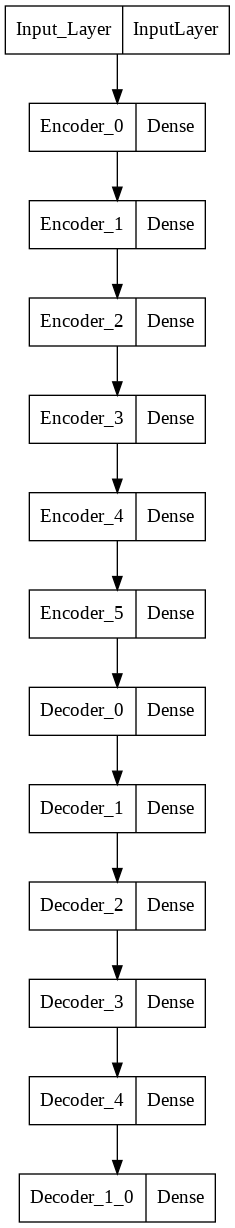

In [ ]:
plot_model(auto_encoder_best)

Rendimiento en los datos de validación:

In [ ]:
evaluation = auto_encoder_best.evaluate(X_val, X_val)
print('Validation loss : {:.3f}'.format(evaluation))

172/172 [==============================] - 1s 2ms/step - loss: 6.5675
Validation loss : 6.568


In [ ]:
predicted = auto_encoder_best.predict(X_val[:10], batch_size=1)

predicted[0].shape

(784,)

Se grafican las imagenes reconstruidas:

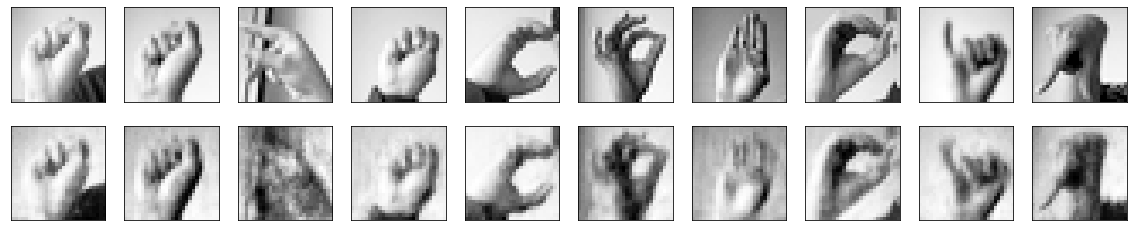

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([X_val[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

### Transferencia de conocimiento

In [ ]:
encoder = Sequential(name='Encoder')

for layers in auto_encoder_best.layers:
    if "Decoder" in layers.name:
        break
    print(layers.name)
    layers.trainable = False
    encoder.add(layers)

Encoder_0
Encoder_1
Encoder_2
Encoder_3
Encoder_4
Encoder_5


In [ ]:
def get_model(meta, activation, n_layers, hidden_layers_list):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    dims = hidden_layers_list

    model = Sequential(name="Red_CV")
    model.add(Dense(n_features_in_, input_shape=X_shape_[1:]))

    for i in range(n_layers):
        model.add(Dense(dims[i], activation=activation))
    
    model.add(Dense(24, activation='sigmoid'))
    model.add(Dense(24, activation='softmax'))
    return model

In [ ]:
new_encoder = Sequential(name='Encoder')

new_encoder.add(Input(shape=(X_train.shape[1]), name='Input_Layer'))
new_encoder.add(encoder)

new_encoder.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Sequential)        (None, 64)                4403136   
                                                                 
Total params: 4,403,136
Trainable params: 0
Non-trainable params: 4,403,136
_________________________________________________________________


In [ ]:
def get_model_mlp_classifier(meta, activation, n_layers, hidden_layers_list):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    dims = hidden_layers_list

    model = Sequential(name='Clasificador')

    #Capa de Entrada
    clf.add(Input(shape=(X_shape_[1:]), name='Input_Layer'))

    #Capas Ocultas
    clf.add(encoder)

    #model.add(Dense(n_features_in_, input_shape=X_shape_[1:]))

    for i in range(n_layers):
        model.add(Dense(dims[i], activation=activation))
  
    model.add(Dense(24, activation='softmax'))
    return model
#Búsqueda de hiperparámetros para el nuevo perceptrón multicapa    
final_params = {
    'hidden_layers_list':  [[64], [128]*2, [128]*4, [256], [256]*2, [256]*4],
    "epochs": [50, 100, 500],
    'optimizer': ["adam", "sgd", "RMSprop"],
    "activation": ["relu", "sigmoid", "softmax"],
    'n_layers':[1, 2, 4, 1, 2, 4],
    #'batch_size':[10, 50, 100, 200]
}
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),
]
clf = KerasClassifier(
    get_model,
    loss="categorical_crossentropy",
    n_layers=4,
    metrics=["accuracy"],
    epochs=100,
    activation="sigmoid",
    hidden_layers_list = [256]*4
)
grid = RandomizedSearchCV(clf, final_params, cv=3, scoring='accuracy', n_iter=10, random_state=33)
grid.fit(X_train,          
        y_train,
        batch_size=200, 
        callbacks=my_callbacks
)

Epoch 1/50
74/74 [==============================] - 0s 3ms/step - loss: 3.2626 - accuracy: 0.0434
Epoch 2/50
74/74 [==============================] - 0s 2ms/step - loss: 3.2111 - accuracy: 0.0434
Epoch 3/50
74/74 [==============================] - 0s 2ms/step - loss: 3.1923 - accuracy: 0.0434
Epoch 4/50
74/74 [==============================] - 0s 3ms/step - loss: 3.1832 - accuracy: 0.0449
Epoch 5/50
74/74 [==============================] - 0s 2ms/step - loss: 3.1780 - accuracy: 0.0516
Epoch 6/50
74/74 [==============================] - 0s 2ms/step - loss: 3.1746 - accuracy: 0.0581
Epoch 7/50
74/74 [==============================] - 0s 3ms/step - loss: 3.1721 - accuracy: 0.0594
Epoch 8/50
74/74 [==============================] - 0s 2ms/step - loss: 3.1701 - accuracy: 0.0644
Epoch 9/50
74/74 [==============================] - 0s 2ms/step - loss: 3.1684 - accuracy: 0.0686
Epoch 10/50
74/74 [==============================] - 0s 2ms/step - loss: 3.1669 - accuracy: 0.0662
Epoch 11/50
74/74 [

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
24 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
24 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py", line 1494, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers.py", line 767, in fit
    **kwargs,
  File "/usr/local/lib/python3.7/dist-packages/scikeras/wrappers

110/110 [==============================] - 1s 3ms/step - loss: 3.1810 - accuracy: 0.0446
Epoch 2/100
110/110 [==============================] - 0s 3ms/step - loss: 2.8059 - accuracy: 0.1952
Epoch 3/100
110/110 [==============================] - 0s 3ms/step - loss: 2.0413 - accuracy: 0.4780
Epoch 4/100
110/110 [==============================] - 0s 3ms/step - loss: 1.4576 - accuracy: 0.6680
Epoch 5/100
110/110 [==============================] - 0s 3ms/step - loss: 1.0081 - accuracy: 0.7978
Epoch 6/100
110/110 [==============================] - 0s 3ms/step - loss: 0.6901 - accuracy: 0.8809
Epoch 7/100
110/110 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.9319
Epoch 8/100
110/110 [==============================] - 0s 3ms/step - loss: 0.3351 - accuracy: 0.9645
Epoch 9/100
110/110 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9925
Epoch 10/100
110/110 [==============================] - 0s 3ms/step - loss: 0.1499 - accuracy: 0.9957
E

RandomizedSearchCV(cv=3,
                   estimator=KerasClassifier(activation='sigmoid', epochs=100, hidden_layers_list=[256, 256, 256, 256], loss='categorical_crossentropy', metrics=['accuracy'], model=<function get_model at 0x7f43a4718440>, n_layers=4),
                   param_distributions={'activation': ['relu', 'sigmoid',
                                                       'softmax'],
                                        'epochs': [50, 100, 500],
                                        'hidden_layers_list': [[64], [128, 128],
                                                               [128, 128, 128,
                                                                128],
                                                               [256],
                                                               [256, 256],
                                                               [256, 256, 256,
                                                                256]],
         

In [ ]:
best_model = grid.best_estimator_

grid.best_params_

{'optimizer': 'adam',
 'n_layers': 2,
 'hidden_layers_list': [256, 256],
 'epochs': 100,
 'activation': 'relu'}

In [ ]:
y_pred = best_model.predict(X_train)

print(classification_report(y_true=y_train, y_pred=y_pred))

687/687 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       899
         1.0       1.00      1.00      1.00       806
         2.0       1.00      1.00      1.00       915
         3.0       1.00      1.00      1.00       952
         4.0       1.00      1.00      1.00       767
         5.0       1.00      1.00      1.00       946
         6.0       1.00      1.00      1.00       868
         7.0       1.00      1.00      1.00       806
         8.0       1.00      1.00      1.00       926
        10.0       1.00      1.00      1.00       876
        11.0       1.00      1.00      1.00      1023
        12.0       1.00      1.00      1.00       861
        13.0       1.00      1.00      1.00       930
        14.0       1.00      1.00      1.00       964
        15.0       1.00      1.00      1.00       872
        16.0       1.00      1.00      1.00      1019
        17.0       1.00   

El resultado anterior muestra que el modelo entrenó bastante bien con los datos de entrenamiento.

### 4.2.1 Evaluación

In [ ]:
y_pred = best_model.predict(X_test)

print(classification_report(y_true=y_test, y_pred=y_pred))

225/225 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       331
         1.0       1.00      0.90      0.95       432
         2.0       0.97      1.00      0.99       310
         3.0       0.96      0.92      0.94       245
         4.0       0.87      0.99      0.93       498
         5.0       0.92      0.91      0.92       247
         6.0       0.77      0.68      0.72       348
         7.0       0.91      0.91      0.91       436
         8.0       0.79      0.85      0.82       288
        10.0       0.75      0.71      0.73       331
        11.0       0.78      0.90      0.83       209
        12.0       0.86      0.78      0.82       394
        13.0       0.73      0.58      0.64       291
        14.0       1.00      0.84      0.91       246
        15.0       0.94      1.00      0.97       347
        16.0       0.65      0.87      0.75       164
        17.0       0.81   

In [ ]:
labels

{0: 'A',
 1: 'B',
 2: 'C',
 3: 'D',
 4: 'E',
 5: 'F',
 6: 'G',
 7: 'H',
 8: 'I',
 10: 'K',
 11: 'L',
 12: 'M',
 13: 'N',
 14: 'O',
 15: 'P',
 16: 'Q',
 17: 'R',
 18: 'S',
 19: 'T',
 20: 'U',
 21: 'V',
 22: 'W',
 23: 'X',
 24: 'Y'}

El resultado anterior refleja que se obtuvo un mejor desempeño en los datos de test que sólo con el perceptrón multicapa obtenido en el punto 4.1. Asimismo, el perceptrón multicapa en este punto tiene sólo 2 capas. La clases con mejor precision fueron la 1 (letra 'B')y la 14 (letra 'O'). La precisión más baja se obtuvo en la etiqueta 22 (letra 'W').

### 4.3 Denosing autoencoder

## Agregamos ruido con distribución normal con promedio = 0.1 y sd = 0.02 
(Teniendo en cuenta que la probabilidad de tener un dato menor a 3 desviaciones estandar de la media = (0.04) es mínima)

In [ ]:
trainNoise = np.random.normal(loc=0.1, scale=0.02, size=X_train.shape)
testNoise = np.random.normal(loc=0.1, scale=0.02, size=X_test.shape)
valNoise = np.random.normal(loc=0.1, scale=0.02, size=X_val.shape)

Creamos nuestro nuevo X train, test y val

In [ ]:
trainXNoisy = np.clip(X_train + trainNoise, 0, 1)
testXNoisy = np.clip(X_test + testNoise, 0, 1)
valXNoisy = np.clip(X_val + valNoise, 0, 1)

Vemos las imágenes originales y las denoising

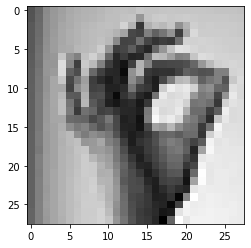

In [ ]:
plt.imshow(X_val[5].reshape(28, 28), cmap="gray")

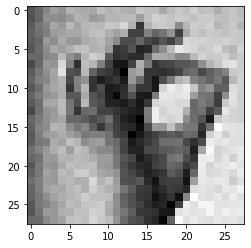

In [ ]:
plt.imshow(valXNoisy[5].reshape(28, 28), cmap="gray")

Autoencoder base

In [ ]:
autoencoder = Sequential(name="Autoencoder")

#Capa de Entrada
autoencoder.add(Input(shape=(X_train.shape[1]), name='Input_Layer'))

#Encoder
autoencoder.add(Dense(512, activation='relu', name='Encoder_1'))
autoencoder.add(Dense(256, activation='relu', name='Encoder_2'))
autoencoder.add(Dense(128, activation='relu', name='Encoder_3'))
autoencoder.add(Dense(64, activation='relu', name='Encoder_4'))

#Decoder
autoencoder.add(Dense(128, activation='relu', name='Decoder_4'))
autoencoder.add(Dense(256, activation='relu', name='Decoder_3'))
autoencoder.add(Dense(512, activation='relu', name='Decoder_2'))
autoencoder.add(Dense(X_train.shape[1], activation='sigmoid', name='Decoder_1'))

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "Autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder_1 (Dense)           (None, 512)               401920    
                                                                 
 Encoder_2 (Dense)           (None, 256)               131328    
                                                                 
 Encoder_3 (Dense)           (None, 128)               32896     
                                                                 
 Encoder_4 (Dense)           (None, 64)                8256      
                                                                 
 Decoder_4 (Dense)           (None, 128)               8320      
                                                                 
 Decoder_3 (Dense)           (None, 256)               33024     
                                                                 
 Decoder_2 (Dense)           (None, 512)               

In [ ]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),
]

In [ ]:
autoencoder.fit(trainXNoisy,          
                X_train, 
                epochs=50, 
                batch_size=50, 
                callbacks=my_callbacks,
                validation_data=(
                    valXNoisy, 
                    X_val
                    )
                )

Epoch 1/50
440/440 [==============================] - 5s 4ms/step - loss: 0.6278 - val_loss: 0.6114
Epoch 2/50
440/440 [==============================] - 2s 4ms/step - loss: 0.6083 - val_loss: 0.6049
Epoch 3/50
440/440 [==============================] - 2s 4ms/step - loss: 0.6032 - val_loss: 0.5998
Epoch 4/50
440/440 [==============================] - 2s 4ms/step - loss: 0.5999 - val_loss: 0.5988
Epoch 5/50
440/440 [==============================] - 2s 4ms/step - loss: 0.5977 - val_loss: 0.5994
Epoch 6/50
440/440 [==============================] - 2s 4ms/step - loss: 0.5963 - val_loss: 0.5944
Epoch 7/50
440/440 [==============================] - 2s 4ms/step - loss: 0.5953 - val_loss: 0.5932
Epoch 8/50
440/440 [==============================] - 2s 5ms/step - loss: 0.5941 - val_loss: 0.5922
Epoch 9/50
440/440 [==============================] - 3s 7ms/step - loss: 0.5933 - val_loss: 0.5931
Epoch 10/50
440/440 [==============================] - 2s 5ms/step - loss: 0.5927 - val_loss: 0.5932

In [ ]:
predicted = autoencoder.predict(valXNoisy[:15], batch_size=1)

predicted[0].shape

(784,)

In [ ]:
evaluation = autoencoder.evaluate(valXNoisy, X_val)
print('Validation loss : {:.3f}'.format(evaluation))

172/172 [==============================] - 0s 2ms/step - loss: 0.5850
Validation loss : 0.585


VEmos figuras originales y las predichas

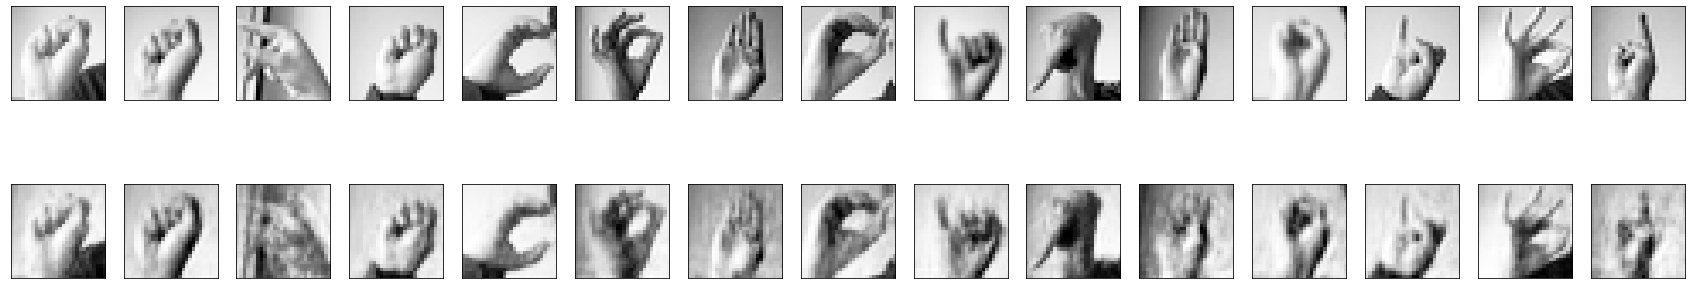

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=15, sharex=True, sharey=True, figsize=(30,6))

for images, row in zip([X_val[:15], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

In [ ]:
import keras_tuner

Definimos grilla para entrenamiento de hiperparámetros:

In [ ]:
def entrenar_red(hp):
      model = Sequential(name = 'Red_Encontrada')
      activation = 'sigmoid'
      n_layers = hp.Choice('n_layers', [1, 2, 3, 4, 5])
      activation_var = hp.Choice('activation_var', ['relu', 'sigmoid'])
      optimizer = hp.Choice('optimizer', ["adam", "sgd", "RMSprop"])
      model.add(Input(shape=(X_train.shape[1]), name='Input_Layerp'))
      for n_layer in range(n_layers):
         model.add(Dense(2**((n_layers+5)- n_layer), activation=activation_var, name='Encoder_'+str(n_layer)))
      for n_layer in range(n_layers-1):
         model.add(Dense(2**(7+n_layer), activation=activation_var, name='Decoder_'+str(n_layer)))
      model.add(Dense(784, activation=activation, name='Decoder_1_0'))
      model.compile(optimizer = optimizer, loss='binary_crossentropy')
      return model

tuner = keras_tuner.RandomSearch(
    entrenar_red,
    objective="val_loss",
    max_trials=30,
    overwrite=True,
    directory="my_dir",
    project_name="tuning_auto",
)     

In [ ]:
with tf.device('/device:GPU:0'): 
  tuner.search(trainXNoisy, X_train, epochs=50, batch_size=200, validation_data=(valXNoisy, X_val), callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])

Trial 23 Complete [00h 00m 42s]
val_loss: 0.5894585251808167

Best val_loss So Far: 0.5815605521202087
Total elapsed time: 00h 17m 44s


obtenemos el mejor modelo:

In [ ]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.build(input_shape=(None, 28, 28))
best_model.summary()

Model: "Red_Encontrada"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder_0 (Dense)           (None, 1024)              803840    
                                                                 
 Encoder_1 (Dense)           (None, 512)               524800    
                                                                 
 Encoder_2 (Dense)           (None, 256)               131328    
                                                                 
 Encoder_3 (Dense)           (None, 128)               32896     
                                                                 
 Encoder_4 (Dense)           (None, 64)                8256      
                                                                 
 Decoder_0 (Dense)           (None, 128)               8320      
                                                                 
 Decoder_1 (Dense)           (None, 256)            

In [ ]:
evaluation = best_model.evaluate(valXNoisy, X_val)
print('Validation loss : {:.3f}'.format(evaluation))
predicted = best_model.predict(valXNoisy[:10], batch_size=1)

predicted[0].shape

172/172 [==============================] - 1s 2ms/step - loss: 0.5816
Validation loss : 0.582


(784,)

Vista del mejor modelo

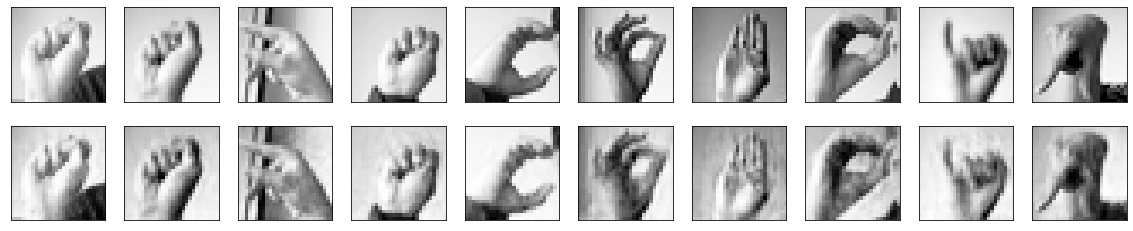

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))

for images, row in zip([X_val[:10], predicted], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

### Transferencia de conocimiento

In [ ]:
encoder = Sequential(name='Encoder')

for layers in best_model.layers:
    if "Decoder" in layers.name:
        break
    print(layers.name)
    layers.trainable = False
    encoder.add(layers)

Encoder_0
Encoder_1
Encoder_2
Encoder_3
Encoder_4


### Traemos el mejor modelo obtenido en los puntos anteriores para clasificar:

In [ ]:
new_encoder = Sequential(name='Encoder')

new_encoder.add(Input(shape=(X_train.shape[1]), name='Input_Layer'))
new_encoder.add(encoder)

new_encoder.summary()

Model: "Encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Encoder (Sequential)        (None, 64)                1501120   
                                                                 
Total params: 1,501,120
Trainable params: 0
Non-trainable params: 1,501,120
_________________________________________________________________


In [ ]:
def get_model_mlp_classifier(meta, activation, n_layers, hidden_layers_list):
    # note that meta is a special argument that will be
    # handed a dict containing input metadata
    n_features_in_ = meta["n_features_in_"]
    X_shape_ = meta["X_shape_"]
    dims = hidden_layers_list

    model = Sequential(name='Clasificador')

    #Capa de Entrada
    model.add(Input(shape=(X_shape_[1:]), name='Input_Layer'))

    #Capas Ocultas
    model.add(encoder)

    #model.add(Dense(n_features_in_, input_shape=X_shape_[1:]))

    for i in range(n_layers):
        model.add(Dense(dims[i], activation=activation))
  
    model.add(Dense(24, activation='softmax'))
    return model

Se trae el autoencoder denoising con el mejor modelo encontrado en el punto anterior.

In [ ]:
clf_mlp = KerasClassifier(
    get_model_mlp_classifier,
    loss="categorical_crossentropy",
    n_layers=2,
    metrics=["accuracy"],
    epochs=100,
    activation="relu",
    optimizer= 'adam',
    hidden_layers_list = [256]*2
)

clf_mlp
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=4),
    tf.keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    tf.keras.callbacks.TensorBoard(log_dir='/content/logs'),
]

In [ ]:
clf_mlp.fit(trainXNoisy,
        pd.get_dummies(y_train),
        callbacks=my_callbacks,
        validation_data=(    
                valXNoisy, 
                pd.get_dummies(y_val)
            )
        )

Epoch 1/100
687/687 [==============================] - 3s 4ms/step - loss: 1.5839 - accuracy: 0.4992 - val_loss: 1.0537 - val_accuracy: 0.6441
Epoch 2/100
687/687 [==============================] - 3s 4ms/step - loss: 0.7605 - accuracy: 0.7484 - val_loss: 0.6004 - val_accuracy: 0.8015
Epoch 3/100
687/687 [==============================] - 3s 4ms/step - loss: 0.4495 - accuracy: 0.8598 - val_loss: 0.3785 - val_accuracy: 0.8765
Epoch 4/100
687/687 [==============================] - 3s 4ms/step - loss: 0.2774 - accuracy: 0.9229 - val_loss: 0.2252 - val_accuracy: 0.9375
Epoch 5/100
687/687 [==============================] - 3s 4ms/step - loss: 0.1777 - accuracy: 0.9544 - val_loss: 0.1338 - val_accuracy: 0.9685
Epoch 6/100
687/687 [==============================] - 3s 4ms/step - loss: 0.1215 - accuracy: 0.9718 - val_loss: 0.1131 - val_accuracy: 0.9729
Epoch 7/100
687/687 [==============================] - 3s 4ms/step - loss: 0.0824 - accuracy: 0.9829 - val_loss: 0.0737 - val_accuracy: 0.9818

KerasClassifier(
	model=<function get_model_mlp_classifier at 0x7fa01d7a2830>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=adam
	loss=categorical_crossentropy
	metrics=['accuracy']
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	n_layers=2
	activation=relu
	hidden_layers_list=[256, 256]
	class_weight=None
)

In [ ]:
y_pred_train = clf_mlp.predict(trainXNoisy)

print(classification_report(y_true=pd.get_dummies(y_train), y_pred=y_pred_train))

687/687 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       899
           1       1.00      1.00      1.00       806
           2       1.00      1.00      1.00       915
           3       1.00      1.00      1.00       952
           4       1.00      1.00      1.00       767
           5       1.00      1.00      1.00       946
           6       1.00      1.00      1.00       868
           7       1.00      1.00      1.00       806
           8       1.00      1.00      1.00       926
           9       1.00      1.00      1.00       876
          10       1.00      1.00      1.00      1023
          11       1.00      1.00      1.00       861
          12       1.00      1.00      1.00       930
          13       1.00      1.00      1.00       964
          14       1.00      1.00      1.00       872
          15       1.00      1.00      1.00      1019
          16       1.00   

In [ ]:
y_pred_val = clf_mlp.predict(valXNoisy)

print(classification_report(y_true=pd.get_dummies(y_val), y_pred=y_pred_val))

172/172 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       227
           1       1.00      1.00      1.00       204
           2       1.00      1.00      1.00       229
           3       1.00      1.00      1.00       244
           4       0.99      1.00      1.00       190
           5       1.00      1.00      1.00       258
           6       1.00      1.00      1.00       222
           7       1.00      1.00      1.00       207
           8       1.00      1.00      1.00       236
           9       1.00      1.00      1.00       238
          10       1.00      1.00      1.00       218
          11       0.99      1.00      1.00       194
          12       1.00      1.00      1.00       221
          13       1.00      1.00      1.00       232
          14       1.00      1.00      1.00       216
          15       1.00      1.00      1.00       260
          16       1.00   

In [ ]:
y_pred_test = clf_mlp.predict(testXNoisy)

print(classification_report(y_true=pd.get_dummies(y_test), y_pred=y_pred_test))

225/225 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       331
           1       0.81      0.73      0.77       432
           2       0.93      0.93      0.93       310
           3       0.55      0.68      0.61       245
           4       0.76      0.90      0.82       498
           5       0.70      0.94      0.80       247
           6       0.70      0.66      0.68       348
           7       0.84      0.91      0.87       436
           8       0.71      0.61      0.65       288
           9       0.51      0.47      0.49       331
          10       0.78      0.71      0.74       209
          11       0.76      0.48      0.59       394
          12       0.31      0.35      0.33       291
          13       0.71      0.60      0.65       246
          14       0.98      0.90      0.94       347
          15       0.82      1.00      0.90       164
          16       0.28   

### 5. Conclusiones

## Descripción de datos
Para el entrenamiento de los modelos, se convirtieron los DataFrame a numpy arrays. El conjunto de entrenamiento, validación y test se normalizaron sobre el valor máximo de cada píxel. Los datos en general estuvieron dentro de los valores esperados, no fue necesario implementar una gran cantidad de operaciones de limpieza de datos.

## Perceptrón multicapa
La variación de hiperparámetros, así como la implementación de callbacks como early stopping y el entrenamiento con el conjunto de validación permitió reducir el nivel de overfitting del modelo del perceptrón multicapa. En general se obuvo un buen resultado, con 2 capas y 512 neuronas en cada capa, así como función de activación sigmoide.


## Autoencoder Undercomplete
El resultado del  encoder y el perceptrón multicapa sobre los datos de test arrojó mejores resultados que sólo el perceptrón multicapa individual del anterior modelo. Esto indica que la sección encoder del autoencoder entrenado logró codificar mejor las caracterísitcas de las distintas imágenes. Asimismo, la arquitectura perceptrón multicapa obtenido con la variación de hiperparámetros, tiene menos neuronas en las capas ocultas que el modelo anterior, 256, obteniendo así un modelo más sencillo para el perceptrón y mejores resultados.

## Denoising Autoencoder
En este modelo se puede apreciar como el accuracy del autoencoder no decrece significativamente aunque la imagen está un poco distorsionada. 
El tuneo de hiperparámetros es rápido y se pueden fijar las funciones de activación de salida y variar las de las neuronas internas.

## Modelos ejecutados
En esta parte se puede observar un accuracy muy similar entre el perceptrón inicial y el autoencoder inicial con transferencia de conocimiento.
Por el contrario, usando el modelo anterior con el denoising autoencoder se puede apreciar que este ruido afecta el modelo.
Se considera hacer doble tuneo de nuevo, con ambos modelos al tiempo y revisar si es significativo este modelo.